<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/laxmisahitya/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

train_df = pd.read_csv('/content/KDDTrain+.txt', names=column_names)
test_df = pd.read_csv('/content/KDDTest+.txt', names=column_names)

print("Train DataFrame Head:")
display(train_df.head())

print("\nTest DataFrame Head:")
display(test_df.head())

categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in train_df.columns if col not in categorical_features and col not in ['attack_type', 'difficulty_level']]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_df[categorical_features])
encoded_test_features = encoder.transform(test_df[categorical_features])

encoded_train_df = pd.DataFrame(encoded_train_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_features))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_numerical = scaler.fit_transform(train_df[numerical_features])
scaled_test_numerical = scaler.transform(test_df[numerical_features])

scaled_train_numerical_df = pd.DataFrame(scaled_train_numerical, columns=numerical_features)
scaled_test_numerical_df = pd.DataFrame(scaled_test_numerical, columns=numerical_features)

train_df_reset = train_df.reset_index(drop=True)
test_df_reset = test_df.reset_index(drop=True)

final_encoded_train_features = pd.concat([scaled_train_numerical_df, encoded_train_df, train_df_reset[['attack_type', 'difficulty_level']]], axis=1)
final_encoded_test_features = pd.concat([scaled_test_numerical_df, encoded_test_df, test_df_reset[['attack_type', 'difficulty_level']]], axis=1)

Train DataFrame Head:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Test DataFrame Head:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('attack_type', axis=1)
y = train_df['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (100778, 42)
Shape of X_test: (25195, 42)
Shape of y_train: (100778,)
Shape of y_test: (25195,)


In [77]:
import pandas as pd

train_file = "/content/KDDTrain+.txt"
test_file = "/content/KDDTest+.txt"

try:
    train_df = pd.read_csv(train_file, header=None)
    test_df = pd.read_csv(test_file, header=None)
except Exception as e:
    print(" Error reading files:", e)
    exit()

print(" Train shape:", train_df.shape)
print(" Test shape:", test_df.shape)

if train_df.shape[1] != test_df.shape[1]:
    print("\n Column count mismatch!")
    print(f"Train columns: {train_df.shape[1]}, Test columns: {test_df.shape[1]}")
else:
    print("\n Same number of columns.")

train_cols = list(train_df.columns)
test_cols = list(test_df.columns)

if train_cols != test_cols:
    print(" Column index mismatch detected!")
else:
    print(" Column indices match.")

mismatch_types = {}
for col in train_df.columns:
    train_type = train_df[col].dtype
    test_type = test_df[col].dtype
    if train_type != test_type:
        mismatch_types[col] = (train_type, test_type)

if mismatch_types:
    print("\n Data type mismatches found:")
    for col, (t_train, t_test) in mismatch_types.items():
        print(f"  - Column {col}: train={t_train}, test={t_test}")
else:
    print("\n Data types are consistent.")

if (train_df.shape[1] == test_df.shape[1]) and not mismatch_types:
    print("\n Train and test datasets are fully consistent!")
else:
    print("\n Some inconsistencies detected. Please review above output.")


 Train shape: (125973, 43)
 Test shape: (22544, 43)

 Same number of columns.
 Column indices match.

 Data types are consistent.

 Train and test datasets are fully consistent!


In [78]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

base_path = "/content/nsl-kdd"

possible_files = [f for f in os.listdir(base_path) if f.endswith(('.csv', '.txt'))]
if not possible_files:
    raise FileNotFoundError(f"No .csv or .txt files found in {base_path}")

data_file = os.path.join(base_path, possible_files[0])
print(f" Using dataset file: {data_file}")

try:
    df = pd.read_csv(data_file)
    if df.shape[1] == 1:
        df = pd.read_csv(data_file, sep='\t')
except Exception as e:
    raise RuntimeError(f" Could not read dataset: {e}")

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y
)

print("\n Train-Test Split Successful!")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

train_path = os.path.join(base_path, "train_split.csv")
test_path  = os.path.join(base_path, "test_split.csv")

pd.concat([X_train, y_train], axis=1).to_csv(train_path, index=False)
pd.concat([X_test, y_test], axis=1).to_csv(test_path, index=False)

print(f"\n Saved train split to: {train_path}")
print(f" Saved test split  to: {test_path}")


 Using dataset file: /content/nsl-kdd/train_split.csv
 Dataset loaded successfully!
Shape: (5976, 43)
   0  tcp  ftp_data  SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  tcp  ftp_data  S0    0     0    0    0    0    0  ...  0.05  0.07   
1  0  tcp      http  SF  218   706    0    0    0    0  ...  1.00  0.00   
2  0  tcp      http  SF  206  1037    0    0    0    0  ...  1.00  0.00   
3  0  tcp   private  S0    0     0    0    0    0    0  ...  0.00  0.08   
4  0  tcp  ftp_data  SF   37     0    0    0    0    0  ...  0.18  0.02   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.00    0.00    1.00    1.00   0.0     0.0  neptune  19  
1    0.00    0.00    0.00    0.00   0.0     0.0   normal  21  
2    0.12    0.02    0.00    0.01   0.0     0.0   normal  21  
3    0.00    0.00    1.00    1.00   0.0     0.0  neptune  18  
4    0.08    0.00    0.35    0.49   0.0     0.0   normal  14  

[5 rows x 43 columns]

 Train-Test Split Successful!
Train: (4482, 4

In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

print("Original Data:")
print(data)

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

print("\nScaled Data:")
print(scaled_data)

print("\nMean of each feature (learned by scaler):")
print(scaler.mean_)

print("\nStandard deviation of each feature (learned by scaler):")
print(scaler.scale_)

new_data = np.array([[10.0, 11.0, 12.0]])
transformed_new_data = scaler.transform(new_data)

print("\nTransformed new data:")
print(transformed_new_data)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Scaled Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Mean of each feature (learned by scaler):
[4. 5. 6.]

Standard deviation of each feature (learned by scaler):
[2.44948974 2.44948974 2.44948974]

Transformed new data:
[[2.44948974 2.44948974 2.44948974]]


In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = {
    'numerical_feature_1': [10, 20, 30, 40, 50],
    'numerical_feature_2': [100, 150, 120, 180, 110],
    'categorical_feature': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataFrame after applying StandardScaler to numerical features:")
print(df)

Original DataFrame:
   numerical_feature_1  numerical_feature_2 categorical_feature
0                   10                  100                   A
1                   20                  150                   B
2                   30                  120                   A
3                   40                  180                   C
4                   50                  110                   B

DataFrame after applying StandardScaler to numerical features:
   numerical_feature_1  numerical_feature_2 categorical_feature
0            -1.414214            -1.093737                   A
1            -0.707107             0.615227                   B
2             0.000000            -0.410152                   A
3             0.707107             1.640606                   C
4             1.414214            -0.751945                   B


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

train_file = "/content/KDDTrain+.txt"
test_file = "/content/KDDTest+.txt"

try:
    train_df = pd.read_csv(train_file, names=column_names)
    test_df = pd.read_csv(test_file, names=column_names)
except FileNotFoundError:
    print("Error: Train or test dataset file not found. Please provide the correct paths.")
    exit()

print("Train DataFrame Head:")
display(train_df.head())

print("\nTest DataFrame Head:")
display(test_df.head())


categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in train_df.columns if col not in categorical_features and col not in ['attack_type', 'difficulty_level']]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_df[categorical_features])
encoded_test_features = encoder.transform(test_df[categorical_features])

encoded_train_df = pd.DataFrame(encoded_train_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_features))

scaler = StandardScaler()
scaled_train_numerical = scaler.fit_transform(train_df[numerical_features])
scaled_test_numerical = scaler.transform(test_df[numerical_features])

scaled_train_numerical_df = pd.DataFrame(scaled_train_numerical, columns=numerical_features)
scaled_test_numerical_df = pd.DataFrame(scaled_test_numerical, columns=numerical_features)

train_df_reset = train_df.reset_index(drop=True)
test_df_reset = test_df.reset_index(drop=True)


X_train = pd.concat([scaled_train_numerical_df, encoded_train_df], axis=1)
X_test = pd.concat([scaled_test_numerical_df, encoded_test_df], axis=1)

y_train = train_df_reset['attack_type']
y_test = test_df_reset['attack_type']

print("\nShape of X_train after encoding and scaling:", X_train.shape)
print("Shape of X_test after encoding and scaling:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Train DataFrame Head:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Test DataFrame Head:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11



Shape of X_train after encoding and scaling: (125973, 122)
Shape of X_test after encoding and scaling: (22544, 122)
Shape of y_train: (125973,)
Shape of y_test: (22544,)


In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [100, 150, 120, 180, 110],
    'feature3': [0.1, 0.2, 0.3, 0.4, 0.5],
    'feature4': [1000, 2000, 1500, 3000, 2500]
}
df_sample_scaling = pd.DataFrame(data)

print("Original DataFrame:")
print(df_sample_scaling)

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_sample_scaling[['feature1', 'feature2']] = scaler_standard.fit_transform(df_sample_scaling[['feature1', 'feature2']])

# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df_sample_scaling[['feature3', 'feature4']] = scaler_minmax.fit_transform(df_sample_scaling[['feature3', 'feature4']])

print("\nDataFrame after scaling:")
print(df_sample_scaling)

Original DataFrame:
   feature1  feature2  feature3  feature4
0        10       100       0.1      1000
1        20       150       0.2      2000
2        30       120       0.3      1500
3        40       180       0.4      3000
4        50       110       0.5      2500

DataFrame after scaling:
   feature1  feature2  feature3  feature4
0 -1.414214 -1.093737      0.00      0.00
1 -0.707107  0.615227      0.25      0.50
2  0.000000 -0.410152      0.50      0.25
3  0.707107  1.640606      0.75      1.00
4  1.414214 -0.751945      1.00      0.75


In [83]:
from sklearn.impute import SimpleImputer
import numpy as np

X_with_nan = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]])

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X_with_nan)

print("Original data with NaN:\n", X_with_nan)
print("Imputed data:\n", X_imputed)

Original data with NaN:
 [[ 1.  2. nan]
 [ 4. nan  6.]
 [ 7.  8.  9.]]
Imputed data:
 [[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


In [84]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [6, np.nan, 8, 9, 10],
    'Feature3': [11, 12, 13, np.nan, 15]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed_mean = df.copy()
df_imputed_mean[['Feature1', 'Feature2', 'Feature3']] = imputer_mean.fit_transform(df_imputed_mean[['Feature1', 'Feature2', 'Feature3']])

print("\nDataFrame after 'mean' imputation:")
print(df_imputed_mean)

imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputed_median = df.copy()
df_imputed_median[['Feature1', 'Feature2', 'Feature3']] = imputer_median.fit_transform(df_imputed_median[['Feature1', 'Feature2', 'Feature3']])

print("\nDataFrame after 'median' imputation:")
print(df_imputed_median)

imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed_most_frequent = df.copy()
df_imputed_most_frequent[['Feature1', 'Feature2', 'Feature3']] = imputer_most_frequent.fit_transform(df_imputed_most_frequent[['Feature1', 'Feature2', 'Feature3']])

print("\nDataFrame after 'most_frequent' imputation:")
print(df_imputed_most_frequent)

imputer_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df_imputed_constant = df.copy()
df_imputed_constant[['Feature1', 'Feature2', 'Feature3']] = imputer_constant.fit_transform(df_imputed_constant[['Feature1', 'Feature2', 'Feature3']])

print("\nDataFrame after 'constant' imputation (filling with 0):")
print(df_imputed_constant)

Original DataFrame:
   Feature1  Feature2  Feature3
0       1.0       6.0      11.0
1       2.0       NaN      12.0
2       NaN       8.0      13.0
3       4.0       9.0       NaN
4       5.0      10.0      15.0

DataFrame after 'mean' imputation:
   Feature1  Feature2  Feature3
0       1.0      6.00     11.00
1       2.0      8.25     12.00
2       3.0      8.00     13.00
3       4.0      9.00     12.75
4       5.0     10.00     15.00

DataFrame after 'median' imputation:
   Feature1  Feature2  Feature3
0       1.0       6.0      11.0
1       2.0       8.5      12.0
2       3.0       8.0      13.0
3       4.0       9.0      12.5
4       5.0      10.0      15.0

DataFrame after 'most_frequent' imputation:
   Feature1  Feature2  Feature3
0       1.0       6.0      11.0
1       2.0       6.0      12.0
2       1.0       8.0      13.0
3       4.0       9.0      11.0
4       5.0      10.0      15.0

DataFrame after 'constant' imputation (filling with 0):
   Feature1  Feature2  Feature3
0   

In [85]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

data = {'numerical_column': [1, 2, np.nan, 4, 5],
        'categorical_column': ['A', 'B', np.nan, 'A', 'B']}
df_sample = pd.DataFrame(data)

print("Original DataFrame:")
print(df_sample)

imputer_numerical = SimpleImputer(strategy='mean')
df_sample['numerical_column'] = imputer_numerical.fit_transform(df_sample[['numerical_column']])

imputer_categorical = SimpleImputer(strategy='most_frequent')
df_sample['categorical_column'] = imputer_categorical.fit_transform(df_sample[['categorical_column']])[:, 0]

print("\nDataFrame after imputation:")
print(df_sample)

Original DataFrame:
   numerical_column categorical_column
0               1.0                  A
1               2.0                  B
2               NaN                NaN
3               4.0                  A
4               5.0                  B

DataFrame after imputation:
   numerical_column categorical_column
0               1.0                  A
1               2.0                  B
2               3.0                  A
3               4.0                  A
4               5.0                  B


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

train_path = "/content/nsl-kdd/train_split.csv"
test_path  = "/content/nsl-kdd/test_split.csv"

try:
    X_train = pd.read_csv(train_path)
    X_test = pd.read_csv(test_path)

    y_train = X_train.iloc[:, -1]
    X_train = X_train.iloc[:, :-1]
    y_test = X_test.iloc[:, -1]
    X_test = X_test.iloc[:, :-1]

except FileNotFoundError:
    print("Error: Train or test split dataset file not found. Please ensure cell 'fI28SIEgXt0r' was run successfully.")
    exit()

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train data shape: (4482, 42)
Test data shape: (1494, 42)
Train target shape: (4482,)
Test target shape: (1494,)


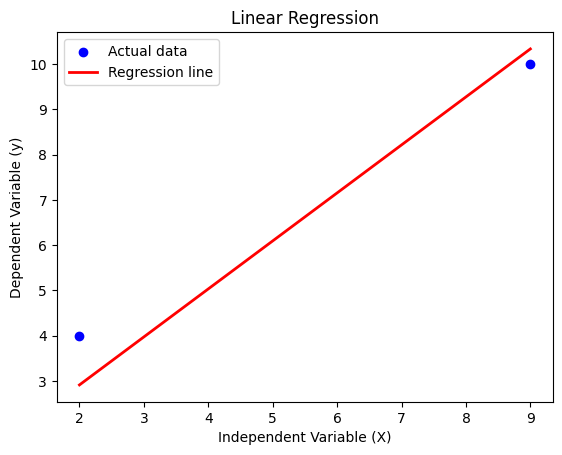

Mean Squared Error (MSE): 0.65
R-squared (R2): 0.93
Model Coefficient (slope): 1.06
Model Intercept: 0.79


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 6, 7, 8, 9, 10, 12])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_train = pd.concat([scaled_train_numerical_df, encoded_train_df], axis=1)
y_train = train_df_reset['attack_type']

logistic_regression_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)


logistic_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Decision Tree model trained.")
print("Random Forest model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
